# NoteBook Portafolio de Inversion

### Lectura de librerias 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.optimize import minimize
import scipy.stats as stats

In [2]:
import yfinance as yf
import pandas as pd

# Lista de símbolos de acciones
symbols = ['BOGOTA.CL', 'BCOLOMBIA.CL', 'CELSIA.CL', 'GEB.CL', 'CEMARGOS.CL', 'CORFICOLCF.CL', 'EXITO.CL', 'ISA.CL', 'MINEROS.CL', 'PFDAVVNDA.CL', 'PFBCOLOM.CL', 'PROMIGAS.CL', 'TERPEL.CL' ]

# Crear un diccionario para almacenar los datos de cierre de cada acción
historical_data = {}

# Obtener los datos históricos de cierre para cada símbolo
for symbol in symbols:
    ticker = yf.Ticker(symbol)
    historical_data[symbol] = ticker.history(period='1y')['Close']

# Crear un DataFrame a partir del diccionario
df_inicial = pd.DataFrame(historical_data)

df_inicial.tail(5)




,BOGOTA.CL,BCOLOMBIA.CL,CELSIA.CL,GEB.CL,CEMARGOS.CL,CORFICOLCF.CL,EXITO.CL,ISA.CL,MINEROS.CL,PFDAVVNDA.CL,PFBCOLOM.CL,PROMIGAS.CL,TERPEL.CL
Date,,,,,,,,,,,,,
2024-03-12 00:00:00-04:00,31300.0,31900.0,3900.0,2300.0,7400.0,13640.0,2360.0,17640.0,2550.0,20400.0,31900.0,5150.0,8440.0
2024-03-13 00:00:00-04:00,30860.0,31800.0,3880.0,2280.0,7780.0,13480.0,2365.0,18500.0,2550.0,20420.0,31880.0,5210.0,8460.0
2024-03-14 00:00:00-04:00,29900.0,31700.0,3835.0,2200.0,7750.0,13200.0,2300.0,19200.0,2695.0,20380.0,31520.0,5220.0,8400.0
2024-03-15 00:00:00-04:00,27500.0,31700.0,3500.0,2080.0,8200.0,13040.0,2265.0,19960.0,2630.0,19100.0,31400.0,5160.0,8230.0
2024-03-18 00:00:00-04:00,27500.0,32880.0,3720.0,2220.0,8050.0,13900.0,2330.0,19700.0,2590.0,20500.0,32380.0,5310.0,8260.0


In [3]:
#Si se desea excluir alguna accion por conocimiento Mercado

df_inicial = df_inicial.drop('EXITO.CL', axis=1)

In [4]:
print(df_inicial.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 259 entries, 2023-03-20 00:00:00-04:00 to 2024-03-18 00:00:00-04:00
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BOGOTA.CL      259 non-null    float64
 1   BCOLOMBIA.CL   259 non-null    float64
 2   CELSIA.CL      259 non-null    float64
 3   GEB.CL         259 non-null    float64
 4   CEMARGOS.CL    259 non-null    float64
 5   CORFICOLCF.CL  259 non-null    float64
 6   ISA.CL         259 non-null    float64
 7   MINEROS.CL     259 non-null    float64
 8   PFDAVVNDA.CL   259 non-null    float64
 9   PFBCOLOM.CL    259 non-null    float64
 10  PROMIGAS.CL    259 non-null    float64
 11  TERPEL.CL      259 non-null    float64
dtypes: float64(12)
memory usage: 26.3 KB
None


<Figure size 1000x600 with 0 Axes>

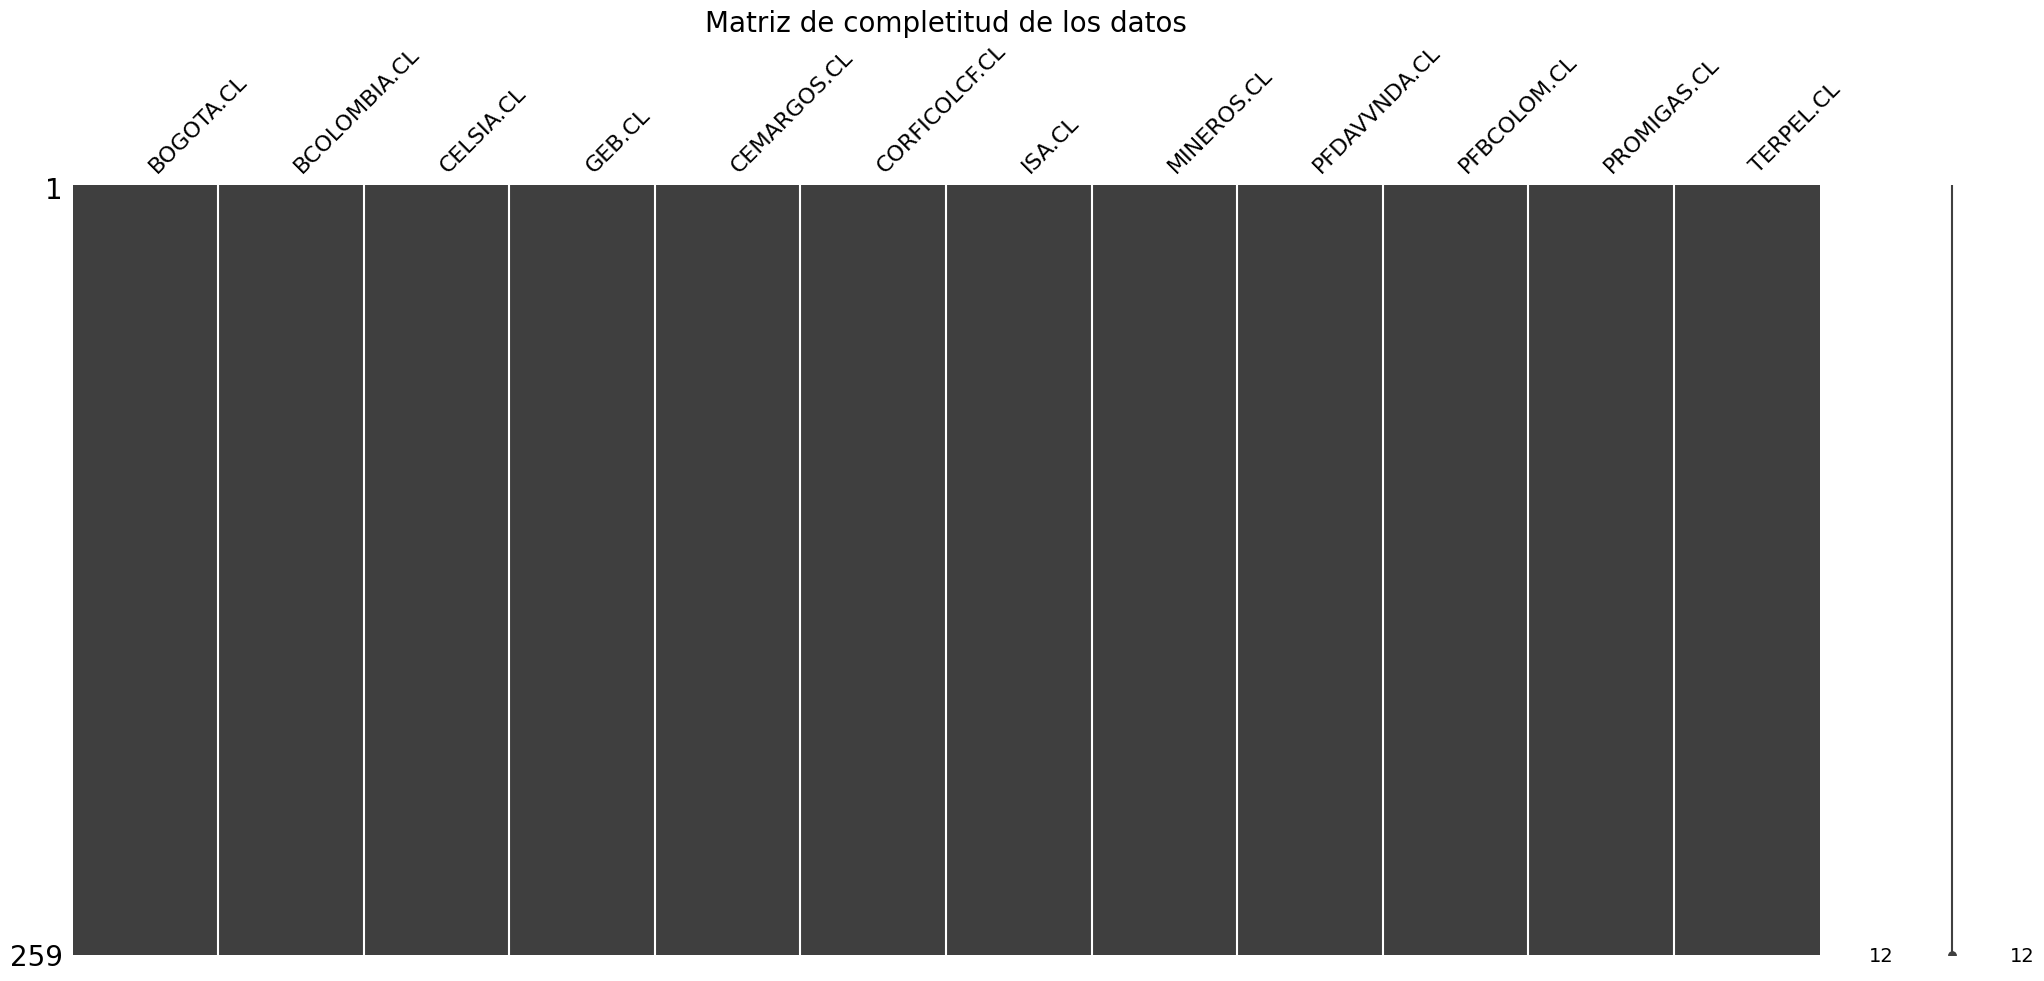

c:\Users\yjimenez\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\cluster\hierarchy.py:2820: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])


<Figure size 1000x600 with 0 Axes>

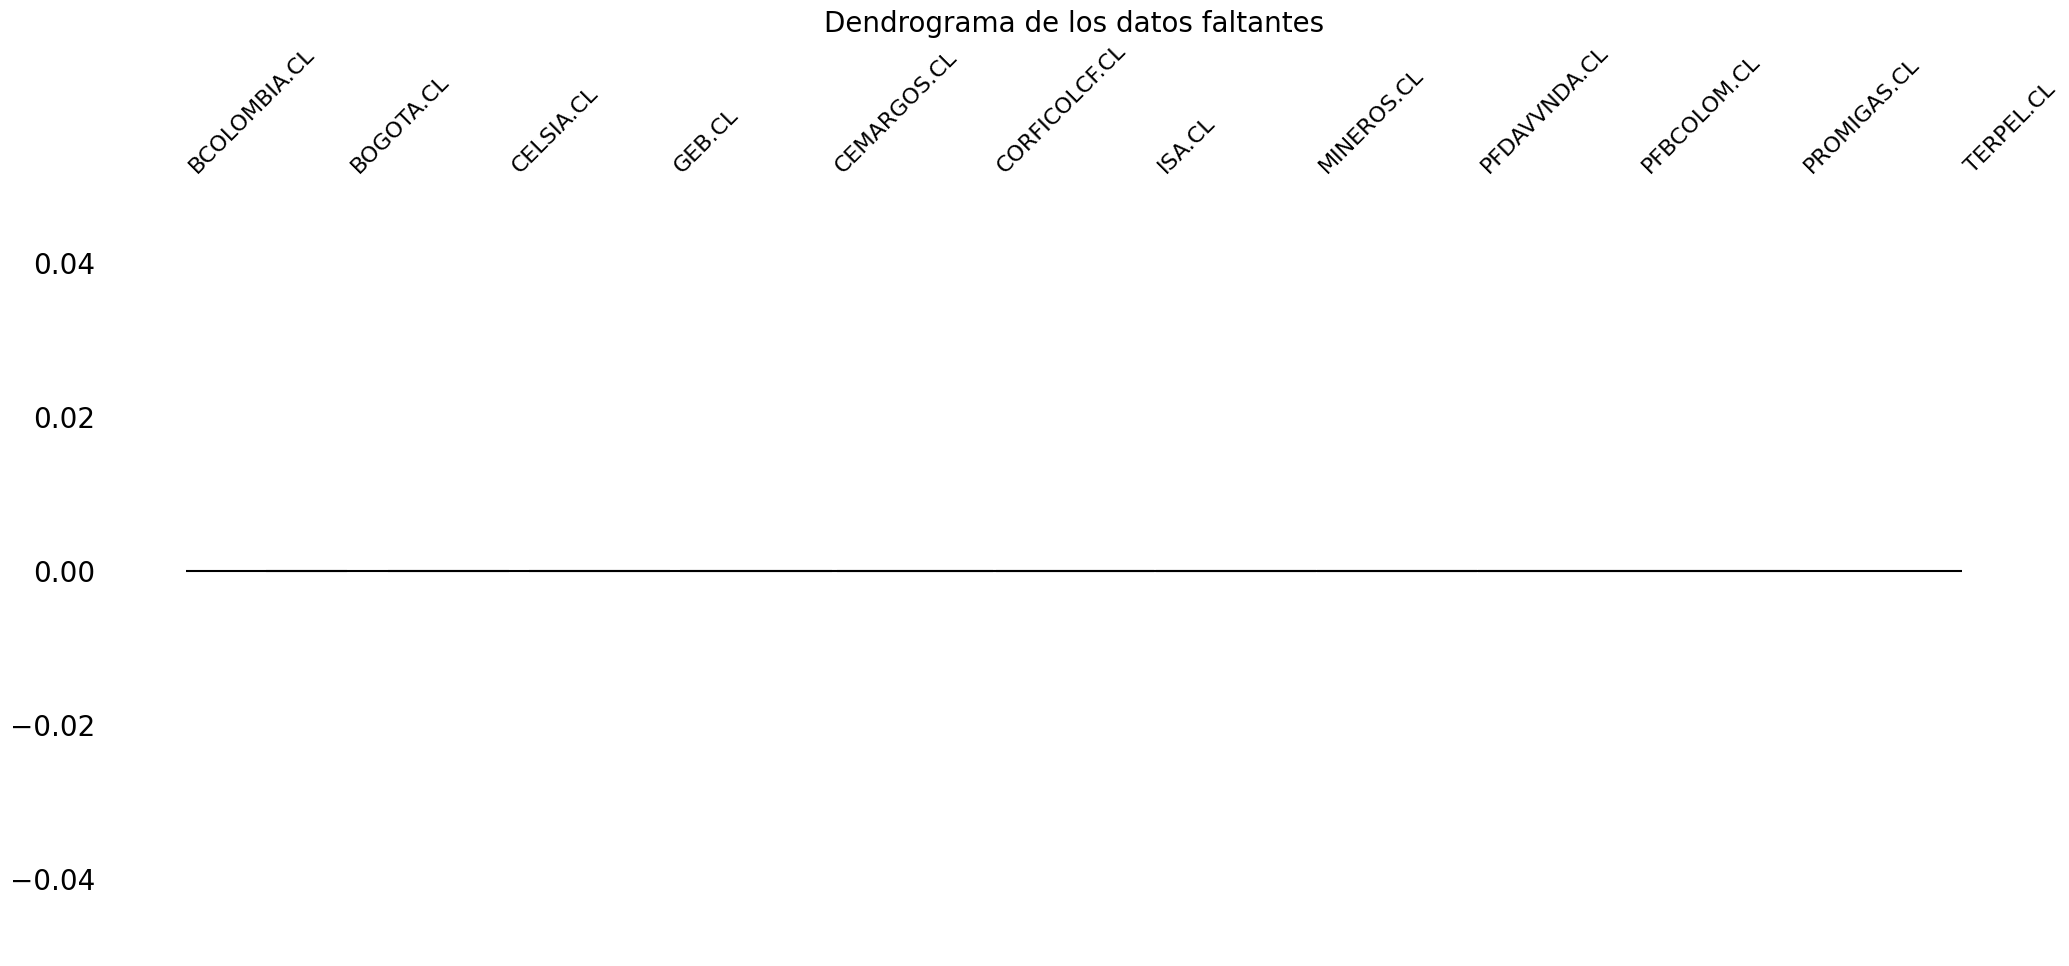

BOGOTA.CL        0
BCOLOMBIA.CL     0
CELSIA.CL        0
GEB.CL           0
CEMARGOS.CL      0
CORFICOLCF.CL    0
ISA.CL           0
MINEROS.CL       0
PFDAVVNDA.CL     0
PFBCOLOM.CL      0
PROMIGAS.CL      0
TERPEL.CL        0
dtype: int64


In [5]:
# Visualizar la completitud de los datos con matriz
plt.figure(figsize=(10,6))
msno.matrix(df_inicial)
plt.title('Matriz de completitud de los datos', fontsize=20)
plt.show()

# Agrupar las columnas con datos faltantes similares con dendrograma
plt.figure(figsize=(10,6))
msno.dendrogram(df_inicial)
plt.title('Dendrograma de los datos faltantes', fontsize=20)
plt.show()

# Resumen de la cantidad de datos faltantes por columna
print(df_inicial.isnull().sum())


Calcular la matriz de correlación

In [6]:
correlacion = df_inicial.corr()
correlacion

,BOGOTA.CL,BCOLOMBIA.CL,CELSIA.CL,GEB.CL,CEMARGOS.CL,CORFICOLCF.CL,ISA.CL,MINEROS.CL,PFDAVVNDA.CL,PFBCOLOM.CL,PROMIGAS.CL,TERPEL.CL
BOGOTA.CL,1.000000,0.461770,0.590499,0.333515,-0.030503,0.363059,0.762501,0.641723,0.744593,0.374246,0.311022,0.634476
BCOLOMBIA.CL,0.461770,1.000000,0.665228,0.538587,0.443554,0.414882,0.493809,0.378862,0.570844,0.792148,0.466972,0.687015
CELSIA.CL,0.590499,0.665228,1.000000,0.841334,0.712797,0.536549,0.658096,0.687893,0.564896,0.879096,0.786762,0.889964
GEB.CL,0.333515,0.538587,0.841334,1.000000,0.857229,0.772938,0.580180,0.313819,0.227444,0.885181,0.905503,0.734684
CEMARGOS.CL,-0.030503,0.443554,0.712797,0.857229,1.000000,0.497331,0.222754,0.170706,-0.073511,0.788253,0.743988,0.526057
CORFICOLCF.CL,0.363059,0.414882,0.536549,0.772938,0.497331,1.000000,0.595080,0.085401,0.237926,0.653271,0.806926,0.502128
ISA.CL,0.762501,0.493809,0.658096,0.580180,0.222754,0.595080,1.000000,0.570185,0.591019,0.556535,0.535085,0.681847
MINEROS.CL,0.641723,0.378862,0.687893,0.313819,0.170706,0.085401,0.570185,1.000000,0.661023,0.406092,0.338517,0.656568
PFDAVVNDA.CL,0.744593,0.570844,0.564896,0.227444,-0.073511,0.237926,0.591019,0.661023,1.000000,0.409305,0.300562,0.740649
PFBCOLOM.CL,0.374246,0.792148,0.879096,0.885181,0.788253,0.653271,0.556535,0.406092,0.409305,1.000000,0.831955,0.796551


Grafico de Correlacion

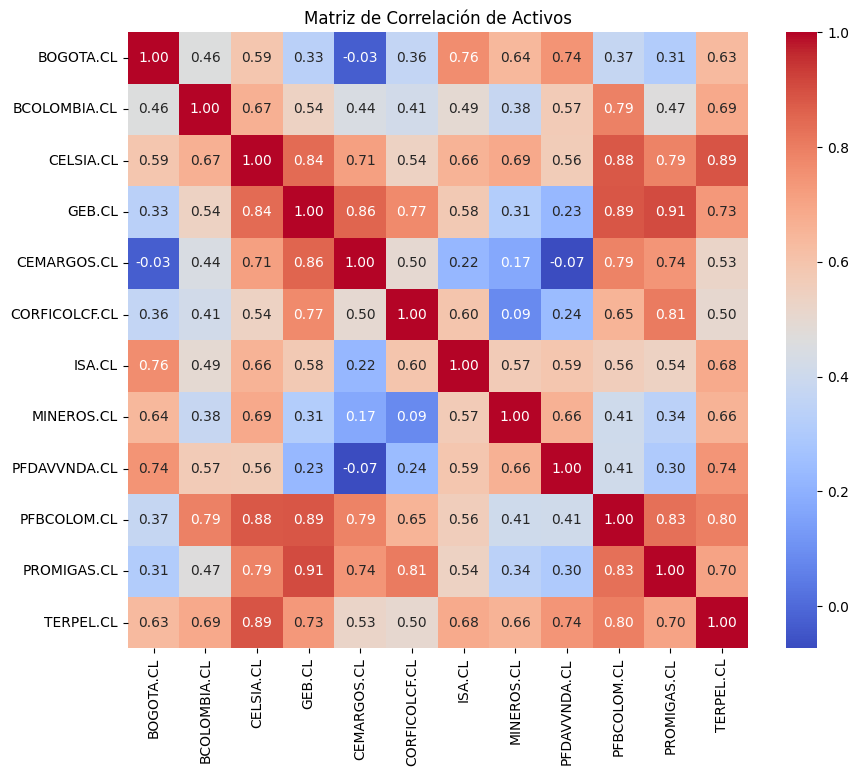

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Activos')
plt.show()


                           CEMARGOS.CL  PFDAVVNDA.CL     BOGOTA.CL  \
Date                                                                 
2023-03-20 00:00:00-04:00  2758.005127  21876.166016  26616.792969   
2023-03-21 00:00:00-04:00  2801.242920  21400.597656  25937.064453   
2023-03-22 00:00:00-04:00  2772.724365  21448.154297  26384.253906   
2023-03-23 00:00:00-04:00  2768.124512  20554.083984  26261.746094   
2023-03-24 00:00:00-04:00  2755.245605  20925.027344  25749.242188   

                           BCOLOMBIA.CL    CELSIA.CL  
Date                                                  
2023-03-20 00:00:00-04:00  28089.009766  2572.049561  
2023-03-21 00:00:00-04:00  28983.562500  2528.700439  
2023-03-22 00:00:00-04:00  29430.839844  2465.482910  
2023-03-23 00:00:00-04:00  29377.167969  2519.669189  
2023-03-24 00:00:00-04:00  30414.851562  2483.545166  


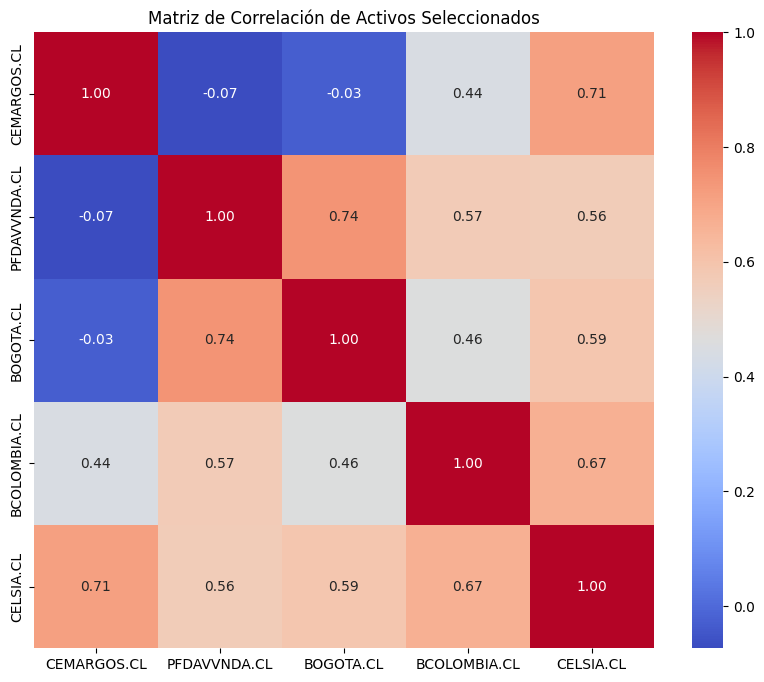

In [8]:
# Seleccionar las variables con correlación cercana a cero
low_corr_vars = correlacion[(correlacion > -0.1) & (correlacion < 0.1)].sum().sort_values().index[:5]

# Obtener el subconjunto de variables no correlacionadas
df_sincorrelacion = df_inicial[low_corr_vars]

# Mostrar las variables seleccionadas
print(df_sincorrelacion.head())

# Visualizar la nueva matriz de correlación de las variables seleccionadas
plt.figure(figsize=(10, 8))
sns.heatmap(df_sincorrelacion.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Activos Seleccionados')
plt.show()


Calculo de la volatilidad simple

BOGOTA.CL        0.102067
BCOLOMBIA.CL     0.109111
CELSIA.CL        0.095763
GEB.CL           0.094059
CEMARGOS.CL      0.125587
CORFICOLCF.CL    0.107867
ISA.CL           0.100179
MINEROS.CL       0.106708
PFDAVVNDA.CL     0.087691
PFBCOLOM.CL      0.078166
PROMIGAS.CL      0.086967
TERPEL.CL        0.077427
dtype: float64


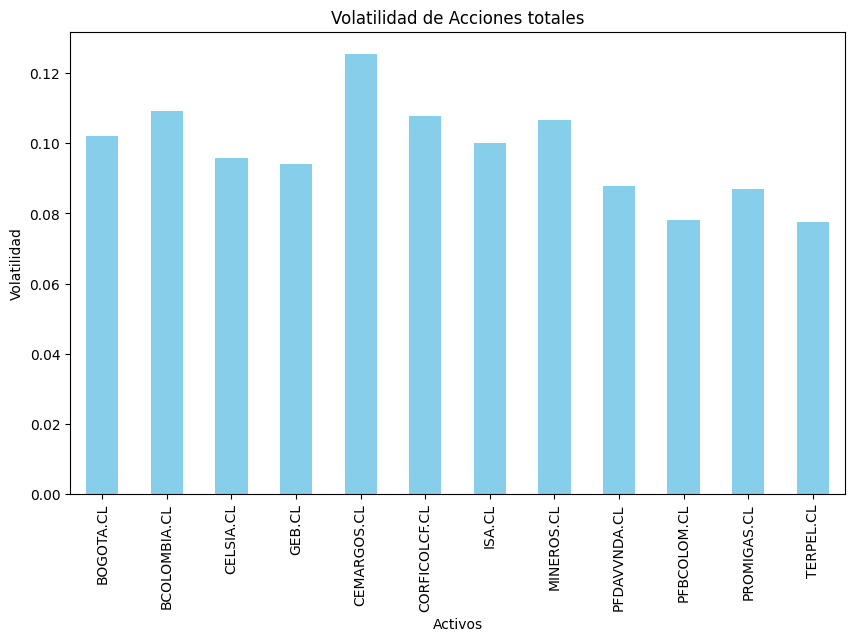

In [9]:
# Calcula los rendimientos diarios
returns = df_inicial.pct_change()

# Calcula la volatilidad como la desviación estándar de los rendimientos diarios expresado en un horizonte Mes
volatilidad = returns.std() * np.sqrt(21)

# Mostrar la volatilidad de cada activo
print(volatilidad)


#Gráfica la volatilidad
volatilidad.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('Activos')
plt.ylabel('Volatilidad')
plt.title('Volatilidad de Acciones totales')
plt.show()

CEMARGOS.CL     0.125587
PFDAVVNDA.CL    0.087691
BOGOTA.CL       0.102067
BCOLOMBIA.CL    0.109111
CELSIA.CL       0.095763
dtype: float64


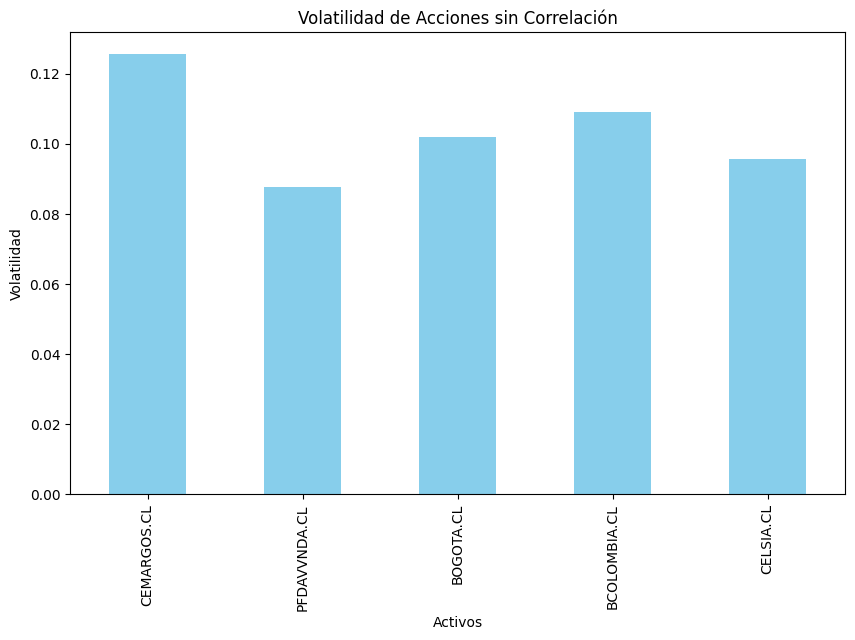

In [10]:
# Calcula los rendimientos diarios sin acciones correlacionadas
returns = df_sincorrelacion.pct_change()

# Calcula la volatilidad como la desviación estándar de los rendimientos diarios expresado en un horizon Mes
volatilidad = returns.std() * np.sqrt(21)

# Mostrar la volatilidad de cada activo
print(volatilidad)


# Suponiendo que tienes la volatilidad calculada en una Serie llamada "volatility"
volatilidad.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('Activos')
plt.ylabel('Volatilidad')
plt.title('Volatilidad de Acciones sin Correlación')
plt.show()

Análisis de volatilidad y rendimiento desde formulacion en python

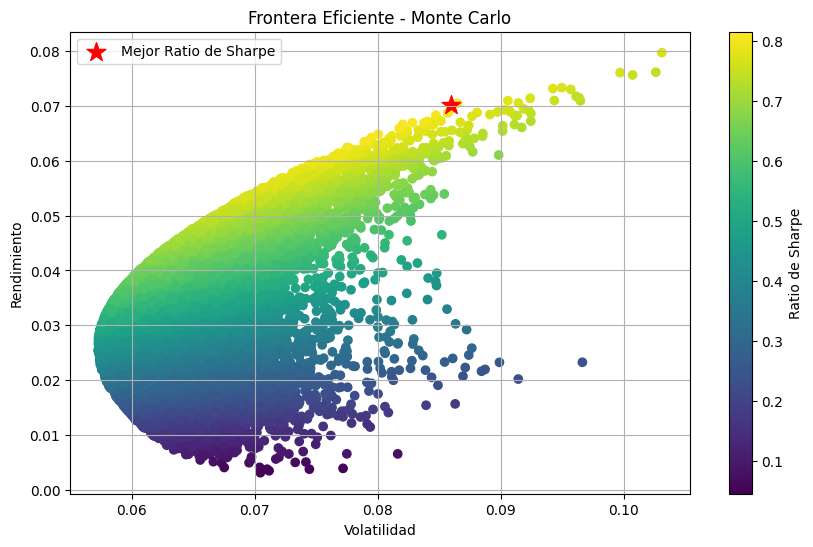

In [44]:
# Calcular los rendimientos diarios
returns = df_sincorrelacion.dropna().pct_change()

# Calcular la matriz de covarianza
cov_matrix = returns.cov()

# Número de simulaciones de Monte Carlo
num_portfolios = 50000

# Almacenar los resultados de rendimiento y volatilidad
results = np.zeros((3, num_portfolios))

# Simular múltiples portafolios
for i in range(num_portfolios):
    # Generar pesos aleatorios
    pesos = np.random.random(len(df_sincorrelacion.columns))
    pesos /= np.sum(pesos)  # Normalizar para que la suma sea 1

    # Calcular rendimiento y volatilidad horizonte tiempo 1 mes
    portfolio_return = np.sum(returns.mean() * pesos) * 21
    portfolio_volatility = np.sqrt(np.dot(pesos.T, np.dot(cov_matrix, pesos))) * np.sqrt(21)

    # Almacenar rendimiento, volatilidad y pesos
    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    results[2, i] = portfolio_return / portfolio_volatility  # Ratio de Sharpe

# Encontrar el portafolio con el mejor ratio de Sharpe
max_sharpe_index = np.argmax(results[2])
best_return = results[0, max_sharpe_index]
best_volatility = results[1, max_sharpe_index]

# Graficar la frontera eficiente
plt.figure(figsize=(10, 6))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', marker='o')
plt.colorbar(label='Ratio de Sharpe')
plt.scatter(best_volatility, best_return, marker='*', color='r', s=200, label='Mejor Ratio de Sharpe')
plt.title('Frontera Eficiente - Monte Carlo')
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
# Mostrar los pesos óptimos del portafolio con el mejor ratio de Sharpe
mejores_pesos = np.round(np.array([pesos]), 4)
print("Pesos óptimos del portafolio con el mejor ratio de Sharpe:")
for i in range(len(df_sincorrelacion.columns)):
    print(df_sincorrelacion.columns[i], ":", mejores_pesos[0, i])

print('------------------------------------')
print('Rendimientos del Portafololio')

# calcular el rendimiento y volatilidad del portafolio óptimo
Radio_de_sharpe = best_return/best_volatility
print(f"Rendimiento óptimo: {best_return * 100:.2f}%")
print(f"Volatilidad óptima: {best_volatility * 100:.2f}%")
print(f"Rendimiento de Sharpe: {Radio_de_sharpe}")

Pesos óptimos del portafolio con el mejor ratio de Sharpe:
CEMARGOS.CL : 0.123
PFDAVVNDA.CL : 0.1825
BOGOTA.CL : 0.2311
BCOLOMBIA.CL : 0.198
CELSIA.CL : 0.2655
------------------------------------
Rendimientos del Portafololio
Rendimiento óptimo: 7.02%
Volatilidad óptima: 8.60%
Rendimiento de Sharpe: 0.8159685943531237


In [46]:
# Crear un DataFrame con los pesos óptimos
portafolio_optimo = pd.DataFrame(data=mejores_pesos, columns=df_sincorrelacion.columns)

# Transponer el DataFrame para que los activos estén en filas y los pesos en columnas
portafolio_optimo = portafolio_optimo.T

# Renombrar la columna de los pesos
portafolio_optimo.columns = ['Peso']

# Agregar la volatilidad al DataFrame de pesos
portafolio_optimo['Volatilidad'] = volatilidad

# Mostrar el DataFrame resultante
print(portafolio_optimo)

                Peso  Volatilidad
CEMARGOS.CL   0.1230     0.125587
PFDAVVNDA.CL  0.1825     0.087691
BOGOTA.CL     0.2311     0.102067
BCOLOMBIA.CL  0.1980     0.109111
CELSIA.CL     0.2655     0.095763


In [47]:
# Solicitar la inversión al usuario
inversion = float(input("Ingrese el monto de la inversión: "))

# Multiplicar la inversión por cada peso en el DataFrame de pesos
portafolio_optimo['Inversión'] = portafolio_optimo['Peso'] * inversion

# Mostrar el DataFrame con la inversión y la volatilidad por cada activo
print(portafolio_optimo)

                Peso  Volatilidad  Inversión
CEMARGOS.CL   0.1230     0.125587   123000.0
PFDAVVNDA.CL  0.1825     0.087691   182500.0
BOGOTA.CL     0.2311     0.102067   231100.0
BCOLOMBIA.CL  0.1980     0.109111   198000.0
CELSIA.CL     0.2655     0.095763   265500.0


In [48]:
# Calcular el VaR
confianza = 0.99
z_score = stats.norm.ppf(confianza)
var = z_score * portafolio_optimo['Inversión'] * portafolio_optimo['Volatilidad'] * np.sqrt(1/21)

# Agregar el VaR al DataFrame de portafolio_optimo
portafolio_optimo['VaR'] = var

# Redondear el VaR a a decimales
portafolio_optimo['VaR'] = portafolio_optimo['VaR'].apply(lambda x: round(x, 1))

# Mostrar el DataFrame con el VaR redondeado por cada activo y la suma total al final
print(portafolio_optimo)

                Peso  Volatilidad  Inversión      VaR
CEMARGOS.CL   0.1230     0.125587   123000.0   7841.8
PFDAVVNDA.CL  0.1825     0.087691   182500.0   8124.2
BOGOTA.CL     0.2311     0.102067   231100.0  11974.3
BCOLOMBIA.CL  0.1980     0.109111   198000.0  10967.2
CELSIA.CL     0.2655     0.095763   265500.0  12907.1


In [49]:
# Sumar la columna 'VaR'
sumVar = portafolio_optimo['VaR'].sum()

# Calcular el riesgo del portafolio como un porcentaje
riesgo_portafolio = (sumVar / inversion)
riesgo_perdida = (inversion * riesgo_portafolio)
print("El Riesgo del Portafolio es: ", riesgo_portafolio,)
print("El Riesgo de perdida es: ", riesgo_perdida,)


El Riesgo del Portafolio es:  0.051814599999999995
El Riesgo de perdida es:  51814.6
